<a href="https://colab.research.google.com/github/AngelJasmine24/DL_MNIST/blob/main/M_Tech_ML_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [ ]:
# Load MNIST dataset

mnist = fetch_openml('mnist_784', version=1)

# Get the data and labels
X, y = mnist['data'], mnist['target'].astype(int)

# Normalize the data
X = X / 255.0  # Scale the pixel values to [0, 1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
class Perceptron:
    def __init__(self, n_features, n_classes, learning_rate=0.01, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = np.zeros((n_classes, n_features))  # Weight matrix for each class
        self.bias = np.zeros(n_classes)  # Bias for each class

    def step_function(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for i, x in enumerate(X):

              #  xi = np.expand_dims(x, axis=0)  # 1D row vector
                yi = y[i]

                # Calculate linear output for all classes
                z = np.dot(self.weights, x.T) + self.bias

                # Predicted output
                y_pred = np.argmax(z)

                # Update weights and bias if misclassified
                if y_pred != yi:
                    # Subtract weights for incorrect class
                    self.weights[y_pred] -= self.lr * x
                    self.bias[y_pred] -= self.lr
                    # Add weights for correct class
                    self.weights[yi] += self.lr * x
                    self.bias[yi] += self.lr

    def predict(self, X):
        z = np.dot(X, self.weights.T) + self.bias
        return np.argmax(z, axis=1)


In [ ]:
# Binarize the labels (one-vs-all strategy)
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)


In [ ]:
X_train = np.array(X_train).astype(float)
y_train=np.array(y_train).astype(int)
X_test=np.array(X_test).astype(float)

In [ ]:
# Number of features (28x28 pixels) and classes (0-9 digits)
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

# Initialize the perceptron model
perceptron = Perceptron(n_features=n_features, n_classes=n_classes, learning_rate=0.01, epochs=10)

# Train the perceptron
perceptron.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 88.29%


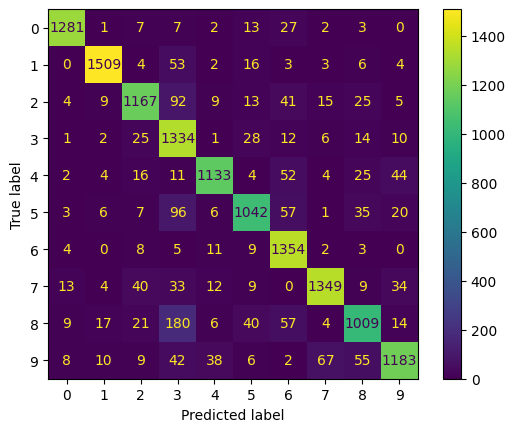

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np


In [ ]:
# Load the IMDB dataset
vocab_size = 10000  # Number of words to consider in the vocabulary

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Check data shape
print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')


In [ ]:
# Define maximum review length
max_length = 500

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)


In [ ]:
# Define the neural network model
model = models.Sequential()

# Embedding layer: maps vocab_size words into 128-dimensional embeddings
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))

# Optional: Add an LSTM layer for better sequence modeling (you can also use GRU)
model.add(layers.LSTM(64, return_sequences=False))

# Fully connected layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Output layer: single unit with sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the model
model.save('imdb_review_classifier.h5')
